# Support Vector Machines

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [3]:
cancer.keys()

dict_keys(['target_names', 'target', 'DESCR', 'feature_names', 'data'])

In [4]:
cancer['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='<U23')

In [5]:
df_in = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])

In [6]:
df_target = pd.DataFrame(cancer['target'],columns=['Cancer'])

In [7]:
df_in.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Train Test Split

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(df_in, np.ravel(df_target), test_size=0.30, random_state=101)

# Train the Support Vector Classifier

In [10]:
from sklearn.svm import SVC

In [11]:
model = SVC(kernel='rbf')

In [12]:
model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## Predictions and Evaluations

Now let's predict using the trained model.

In [13]:
predictions = model.predict(X_test)

In [14]:
from sklearn.metrics import classification_report,confusion_matrix

In [15]:
print(confusion_matrix(y_test,predictions))

[[  0  66]
 [  0 105]]


In [16]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00        66
          1       0.61      1.00      0.76       105

avg / total       0.38      0.61      0.47       171



/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Woah! Notice that we are classifying everything into a single class! This means our model needs to have it parameters adjusted (it may also help to normalize the data).

We can search for parameters using a GridSearch!

# Gridsearch

Finding the right parameters (like what C or gamma values to use) is a tricky task! But luckily, we can be a little lazy and just try a bunch of combinations and see what works best! This idea of creating a 'grid' of parameters and just trying out all the possible combinations is called a Gridsearch, this method is common enough that Scikit-learn has this functionality built in with GridSearchCV! The CV stands for cross-validation which is the

GridSearchCV takes a dictionary that describes the parameters that should be tried and a model to train. The grid of parameters is defined as a dictionary, where the keys are the parameters and the values are the settings to be tested. 

In [17]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [18]:
from sklearn.model_selection import GridSearchCV

In [19]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [20]:
grid.fit(X_train,y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] kernel=rbf, C=0.1, gamma=1 ......................................
[CV]  kernel=rbf, C=0.1, gamma=1, score=0.631578947368421, total=   0.0s
[CV] kernel=rbf, C=0.1, gamma=1 ......................................
[CV]  kernel=rbf, C=0.1, gamma=1, score=0.631578947368421, total=   0.0s
[CV] kernel=rbf, C=0.1, gamma=1 ......................................
[CV]  kernel=rbf, C=0.1, gamma=1, score=0.6363636363636364, total=   0.0s
[CV] kernel=rbf, C=0.1, gamma=0.1 ....................................
[CV]  kernel=rbf, C=0.1, gamma=0.1, score=0.631578947368421, total=   0.0s
[CV] kernel=rbf, C=0.1, gamma=0.1 ....................................
[CV]  kernel=rbf, C=0.1, gamma=0.1, score=0.631578947368421, total=   0.0s
[CV] kernel=rbf, C=0.1, gamma=0.1 ....................................
[CV]  kernel=rbf, C=0.1, gamma=0.1, score=0.6363636363636364, total=   0.0s
[CV] kernel=rbf, C=0.1, gamma=0.01 ................................

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV]  kernel=rbf, C=0.1, gamma=0.001, score=0.631578947368421, total=   0.0s
[CV] kernel=rbf, C=0.1, gamma=0.001 ..................................
[CV]  kernel=rbf, C=0.1, gamma=0.001, score=0.6363636363636364, total=   0.0s
[CV] kernel=rbf, C=0.1, gamma=0.0001 .................................
[CV]  kernel=rbf, C=0.1, gamma=0.0001, score=0.9022556390977443, total=   0.0s
[CV] kernel=rbf, C=0.1, gamma=0.0001 .................................
[CV]  kernel=rbf, C=0.1, gamma=0.0001, score=0.9624060150375939, total=   0.0s
[CV] kernel=rbf, C=0.1, gamma=0.0001 .................................
[CV]  kernel=rbf, C=0.1, gamma=0.0001, score=0.9166666666666666, total=   0.0s
[CV] kernel=rbf, C=1, gamma=1 ........................................
[CV]  kernel=rbf, C=1, gamma=1, score=0.631578947368421, total=   0.0s
[CV] kernel=rbf, C=1, gamma=1 ........................................
[CV]  kernel=rbf, C=1, gamma=1, score=0.631578947368421, total=   0.0s
[CV] kernel=rbf, C=1, gamma=1 ..........

[CV]  kernel=rbf, C=1000, gamma=0.01, score=0.631578947368421, total=   0.0s
[CV] kernel=rbf, C=1000, gamma=0.01 ..................................
[CV]  kernel=rbf, C=1000, gamma=0.01, score=0.631578947368421, total=   0.0s
[CV] kernel=rbf, C=1000, gamma=0.01 ..................................
[CV]  kernel=rbf, C=1000, gamma=0.01, score=0.6363636363636364, total=   0.0s
[CV] kernel=rbf, C=1000, gamma=0.001 .................................
[CV]  kernel=rbf, C=1000, gamma=0.001, score=0.8947368421052632, total=   0.0s
[CV] kernel=rbf, C=1000, gamma=0.001 .................................
[CV]  kernel=rbf, C=1000, gamma=0.001, score=0.9323308270676691, total=   0.0s
[CV] kernel=rbf, C=1000, gamma=0.001 .................................
[CV]  kernel=rbf, C=1000, gamma=0.001, score=0.9166666666666666, total=   0.0s
[CV] kernel=rbf, C=1000, gamma=0.0001 ................................
[CV]  kernel=rbf, C=1000, gamma=0.0001, score=0.9097744360902256, total=   0.0s
[CV] kernel=rbf, C=1000, 

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    1.2s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'kernel': ['rbf'], 'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=3)

In [21]:
grid.best_params_

{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}

In [22]:
grid.best_estimator_

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [23]:
grid_predictions = grid.predict(X_test)

In [24]:
print(confusion_matrix(y_test,grid_predictions))

[[ 60   6]
 [  3 102]]


In [25]:
print(classification_report(y_test,grid_predictions))

             precision    recall  f1-score   support

          0       0.95      0.91      0.93        66
          1       0.94      0.97      0.96       105

avg / total       0.95      0.95      0.95       171



## Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
dtree = DecisionTreeClassifier()

In [28]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [29]:
treepredictop = dtree.predict(X_test)

In [30]:
print(classification_report(y_test,treepredictop))

             precision    recall  f1-score   support

          0       0.88      0.89      0.89        66
          1       0.93      0.92      0.93       105

avg / total       0.91      0.91      0.91       171



In [31]:
features = X_train.columns
features

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [32]:
from IPython.display import Image  as image
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 
from PIL import Image 

In [33]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data, feature_names=features, filled=True, rounded=True)

In [34]:
graph = pydot.graph_from_dot_data(dot_data.getvalue())  

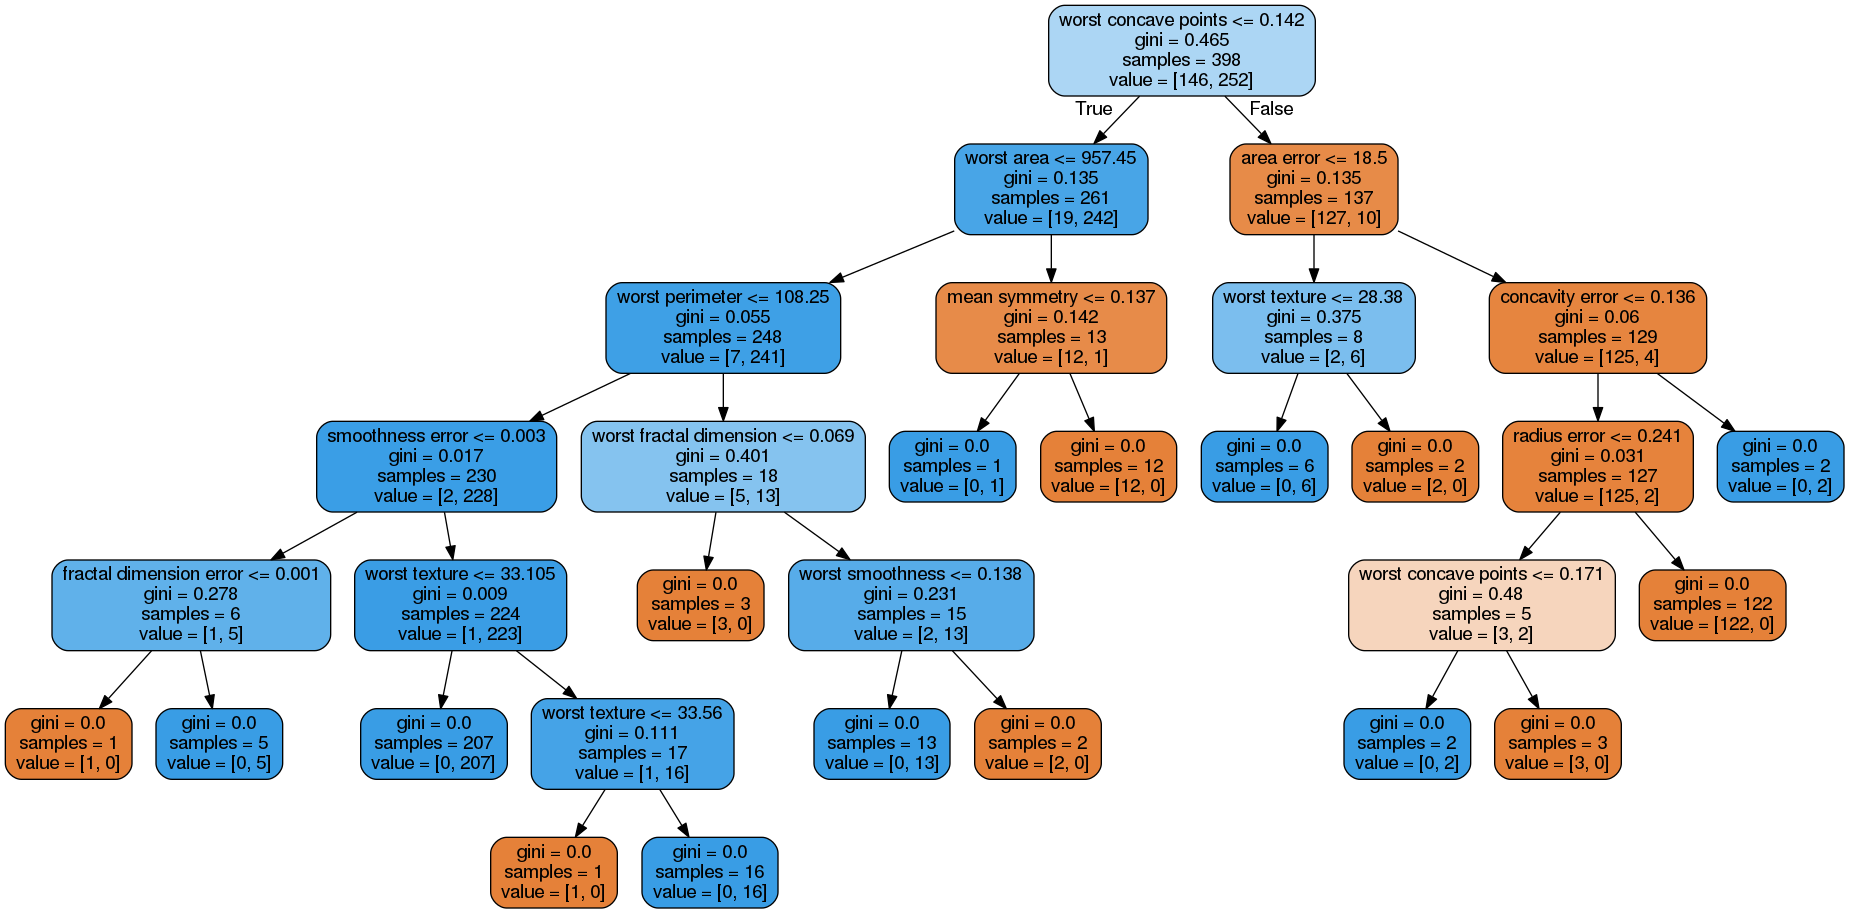

In [35]:
image(graph[0].create_png())  

In [36]:
dtree2 = DecisionTreeClassifier(min_samples_split=50)

In [37]:
dtree2.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=50,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [38]:
tree2predictop = dtree2.predict(X_test)

In [39]:
print(classification_report(y_test,treepredictop))

             precision    recall  f1-score   support

          0       0.88      0.89      0.89        66
          1       0.93      0.92      0.93       105

avg / total       0.91      0.91      0.91       171



In [40]:
dot_data = StringIO()  
export_graphviz(dtree2, out_file=dot_data,feature_names=features,filled=True,rounded=True)


In [41]:
graph = pydot.graph_from_dot_data(dot_data.getvalue())  


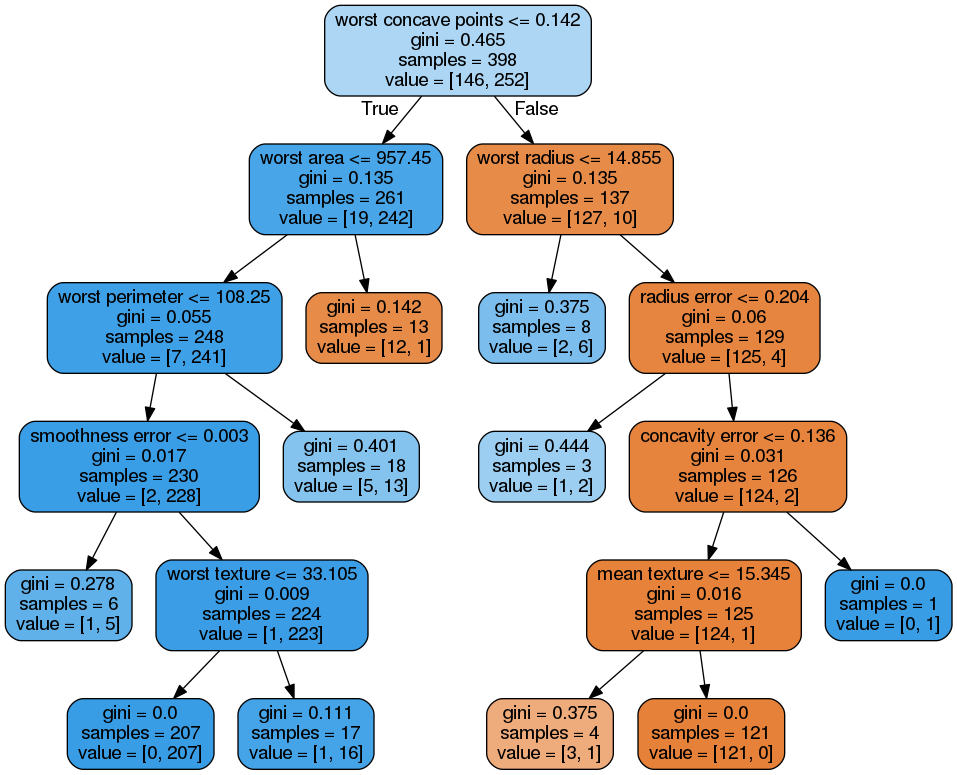

In [42]:
image(graph[0].create_png())  

## Ensemble Methods

Ensemble methods use a number of models to learn on data and then average or vote among their predictions.

There are two families of ensemble methods:
- **Averaging methods**: Bagging methods, Random Forests, ...
- **Boosting methods**: AdaBoost, Gradient Tree Boosting

In [43]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=50, min_samples_split=2)

In [45]:
model.fit(X_train, y_train);

In [46]:
model.score(X_test, y_test)

0.94736842105263153

### AdaBoost

In [47]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(n_estimators=100)

In [48]:
model.fit(X_train, y_train);

In [49]:
model.score(X_test, y_test)

0.94736842105263153

* There are also **RandomForestRegressor** and **AdaBoostRegressor** from `sklearn.ensemble` for regression problems.